In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv',sep='\t',names=['date', 'name','cost','count','leader','recomendet'],na_values='nan',parse_dates=['date'])

In [3]:
data = data.sort_values(by=['name','date'])

In [4]:
data.head()

,date,name,cost,count,leader,recomendet
685,2017-01-21,01: Большой Пожар,1690.0,0,0,0
1308,2017-01-22,01: Большой Пожар,1690.0,0,0,0
2113,2017-01-23,01: Большой Пожар,1690.0,0,0,0
2921,2017-01-24,01: Большой Пожар,1690.0,0,0,0
3728,2017-01-25,01: Большой Пожар,1690.0,0,0,0


In [5]:
shifted = data.copy().shift(1)
equal_names = shifted.name == data.name
p = shifted[equal_names]['count'] - data[equal_names]['count']
del(shifted)

In [6]:
data['sales'] = pd.Series(np.zeros(data.size))
sales = data['sales'].copy()
sales[equal_names] = p
data['sales'] = sales

In [7]:
games_28 = set(data [ pd.DatetimeIndex(data['date']).day == 28 ]['name'].unique())

In [8]:
games_29 = set(data [ pd.DatetimeIndex(data['date']).day == 29 ]['name'].unique())

In [9]:
games_27 = set(data [ pd.DatetimeIndex(data['date']).day == 27 ]['name'].unique())

In [10]:
for game in games_27.difference(games_29):
    print game

Каркассон. Новые Земли
Пандемия: В лаборатории (Pandemic: In The Lab)
Adventure Time (Время Приключений) Конфетные Детективы
Квадрики Свинки (Pick-a-Pig)
Нации (Nations)
Доминион. Интрига
Настолье
Ёрш компакт
Билет на поезд. Америка (Ticket to Ride)
Пандемия Наследие (Pandemic Legacy) синяя
За пятью печатями
Протекторы для карт 80 x 80 mm
Каркассон Крепость
Лабиринт Мастер (Labyrint Master)
Протекторы Card-Pro для наст. игр 44*67 мм. USA mini
Descent: Тень Нерекхолла (расширение)
Эйфория
Воспоминания о 1944 (Memoir'44)
Мачи коро Шарп
Мистер Джек карманный (компактная версия, Mr. Jack Pocket)
Кики Рики (Курятник, Kiki Ricky)
Протекторы GaGa 64мм*89мм
Тантрикс. Карманный
Билет на поезд: Северные Страны (Ticket to Ride: Nordic Countries)
Час Пик (Rush Hour)
Adventure Time (Время Приключений) Книга 1
Adventure Time (Время Приключений) Книга 3
Лабиринт Зеркал
Табу
Билет на поезд Европа
Star Wars. X-Wing. Базовая игра
Мародеры Хаоса (Chaos Marauders)
Времена и эпохи. Смута
Чехарда
Гномы - вр

In [11]:
seles = data[data['sales'] > 0].groupby(['name'])['sales'].sum()

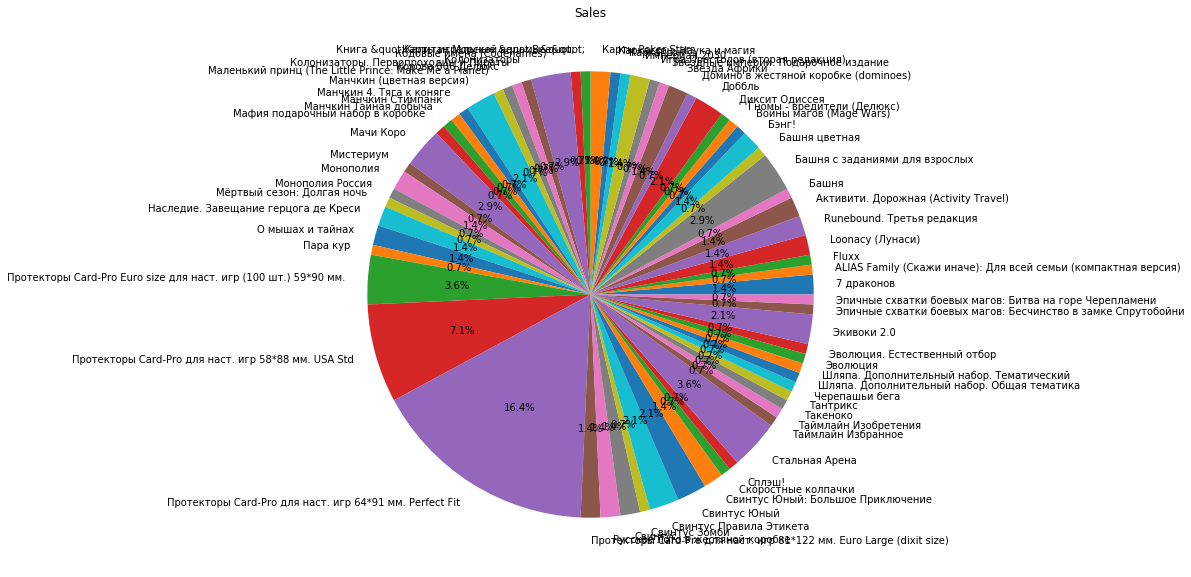

In [12]:
plt.figure(figsize=(10,10))
seles=data[data['sales'] > 0].groupby(['name'])['sales'].sum()
x_list = list(seles)
label_list = [ l.decode('utf-8') for l in list(seles.index) ]
plt.axis("equal")
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Sales")
plt.show()

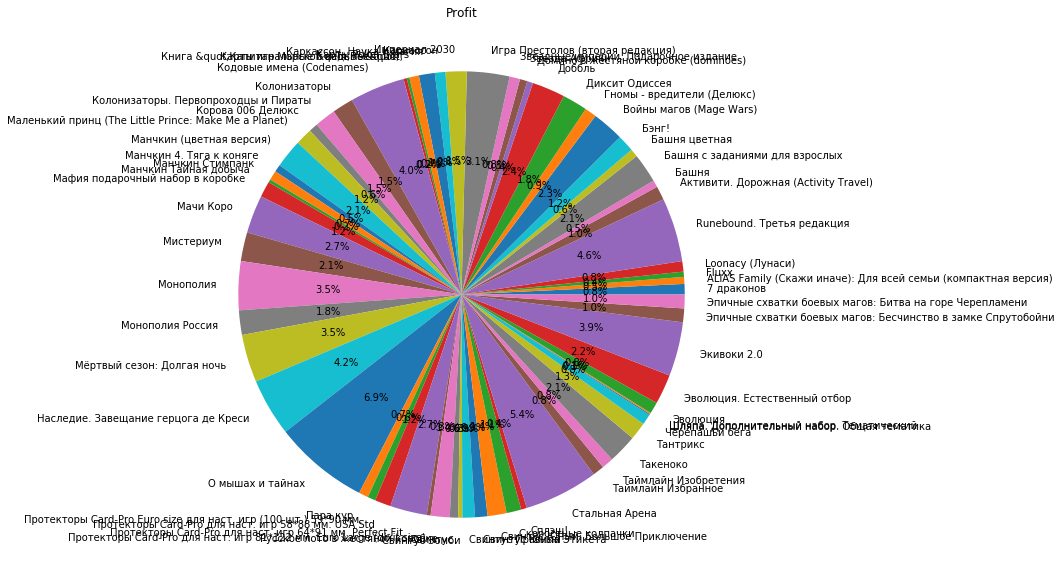

In [13]:
plt.figure(figsize=(10,10))
data['profit'] = 0.3 * data['cost'] * data['sales']
seles=data[data['sales'] > 0].groupby(['name'])['profit'].sum()
x_list = list(seles)
label_list = [ l.decode('utf-8') for l in list(seles.index) ]
plt.axis("equal")
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Profit")
plt.show()

In [14]:
data[data['sales'] > 0]


,date,name,cost,count,leader,recomendet,sales,profit
10053,2017-02-04,7 драконов,490.0,2,0,0,2.0,294.0
5994,2017-01-28,ALIAS Family (Скажи иначе): Для всей семьи (ко...,650.0,5,0,0,1.0,195.0
1041,2017-01-22,Fluxx,490.0,2,0,0,1.0,147.0
3277,2017-01-25,Loonacy (Лунаси),490.0,1,0,0,1.0,147.0
5694,2017-01-28,Loonacy (Лунаси),490.0,0,0,0,1.0,147.0
8644,2017-01-31,Runebound. Третья редакция,2990.0,1,0,0,1.0,897.0
10968,2017-02-06,Runebound. Третья редакция,2990.0,0,0,0,1.0,897.0
9105,2017-02-01,Активити. Дорожная (Activity Travel),650.0,0,0,0,2.0,390.0
3532,2017-01-25,Башня,650.0,9,0,0,1.0,195.0
5764,2017-01-28,Башня с заданиями для взрослых,690.0,1,0,0,4.0,828.0
